In [32]:
from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector = ObjectDetection()
# detector.setModelTypeAsRetinaNet()
detector.setModelTypeAsYOLOv3()
# detector.setModelPath(os.path.join(execution_path , "resnet50_coco_best_v2.0.1.h5"))
# detector.setModelPath("resnet50_coco_best_v2.0.1.h5")
detector.setModelPath("yolo.h5")
detector.loadModel()
# custom_objects = detector.CustomObjects(person=False, car=True)
detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "kiwi.jpg"), output_image_path=os.path.join(execution_path , "kiwi_new.jpg"), minimum_percentage_probability=15)


for eachObject in detections:
    print(eachObject["name"], " : " , eachObject["percentage_probability"], ":", eachObject["box_points"] )
    print("--------------------------------")


dining table  :  76.50521993637085 : (267, 230, 3882, 2874)
--------------------------------
cake  :  16.31183922290802 : (1034, 1320, 1584, 1724)
--------------------------------
cake  :  17.420436441898346 : (0, 2002, 252, 2508)
--------------------------------
cake  :  21.60652130842209 : (1340, 1718, 1898, 2141)
--------------------------------
cake  :  21.92448228597641 : (220, 2065, 835, 2542)
--------------------------------
cake  :  31.975388526916504 : (43, 1655, 660, 2097)
--------------------------------
cake  :  51.78642272949219 : (1671, 1340, 2206, 1761)
--------------------------------
cake  :  58.05584788322449 : (1573, 2142, 2195, 2612)
--------------------------------
cake  :  77.50495672225952 : (267, 230, 3882, 2874)
--------------------------------
orange  :  25.718414783477783 : (1573, 2142, 2195, 2612)
--------------------------------
apple  :  35.56934595108032 : (3098, 407, 3549, 727)
--------------------------------


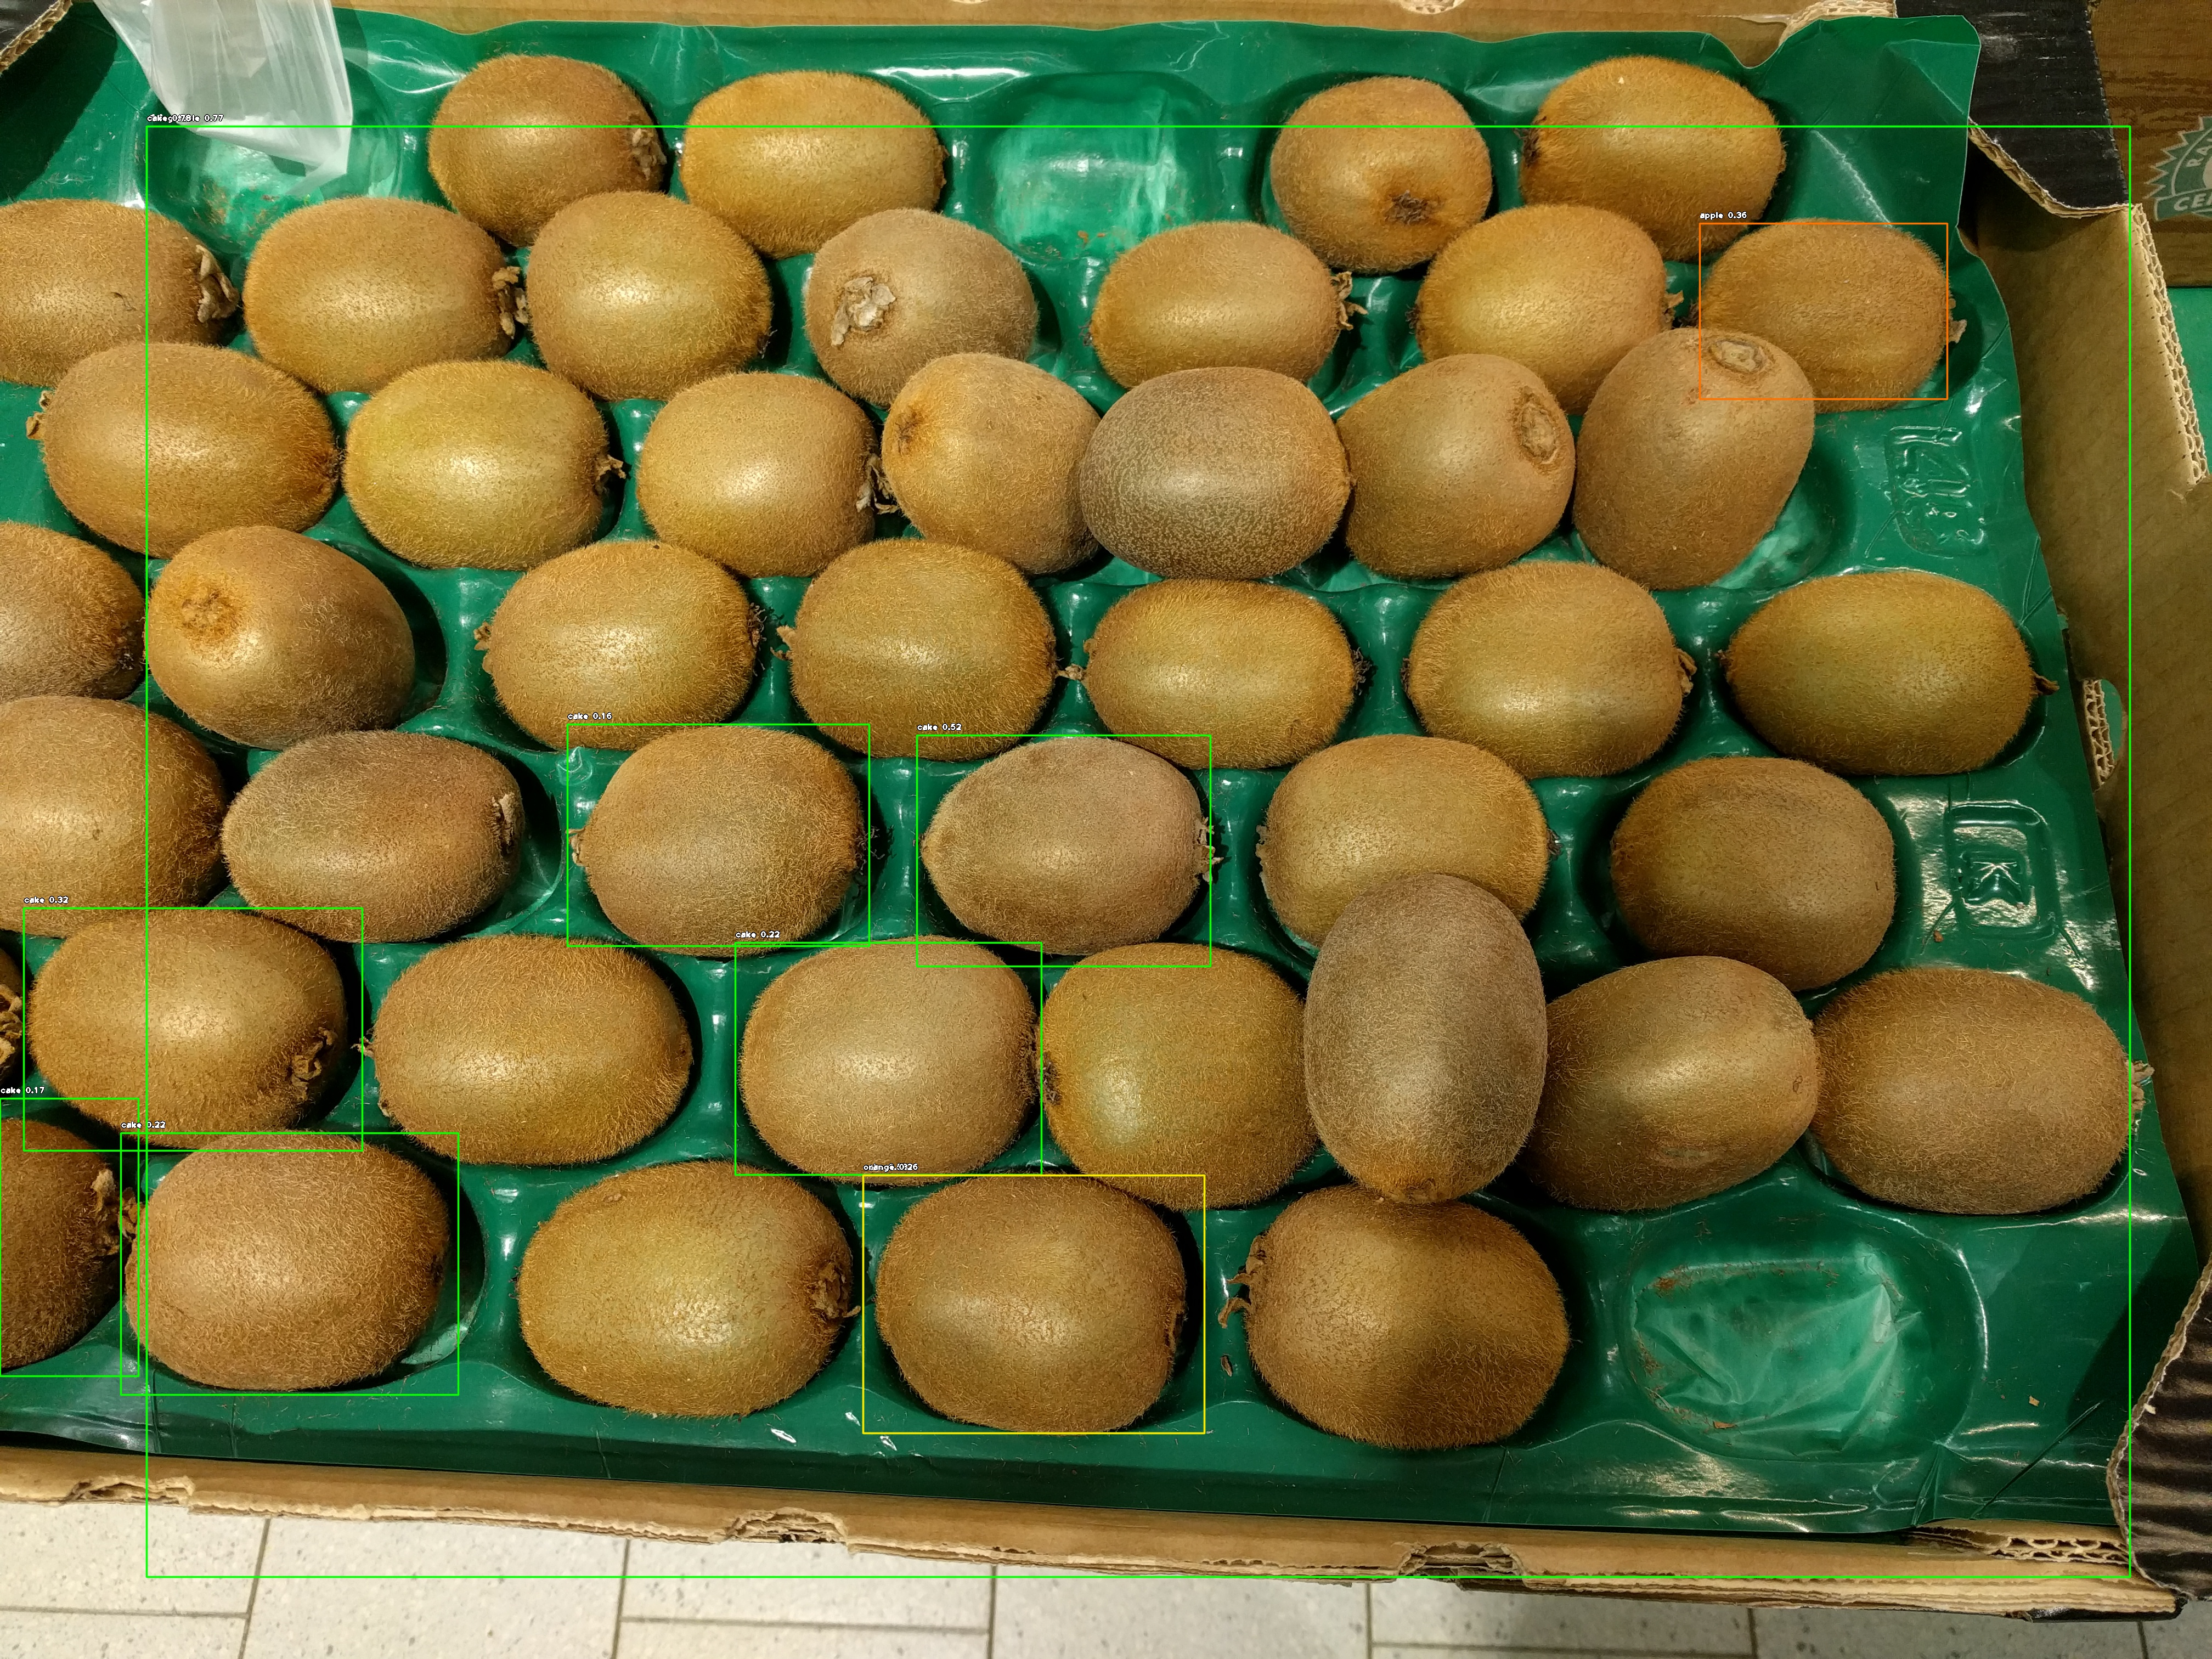

In [33]:
from IPython.display import Image
Image("kiwi_new.jpg")

In [14]:
for eachObject in detections:
    print(eachObject["box_points"])

[384  75 402  90]
[105  82 217 121]


In [46]:
import cv2
import numpy as np
img = cv2.imread('kiwi.jpg',0)
img = cv2.convertScaleAbs(img)
ret,thresh = cv2.threshold(img,127,255,0)
contours = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
print(M)

{'nu03': -9.139568135947602e-05, 'mu02': 23095726226726.938, 'nu11': -0.0002820387476982778, 'm00': 47766983.0, 'mu12': 1419848073288144.0, 'mu11': -643523485537.0469, 'm10': 83810297758.0, 'm03': 2.5956750179970234e+17, 'm20': 196286155812210.0, 'm30': 5.279670479031632e+17, 'nu20': 0.02157857491566905, 'nu21': -4.4536233439569556e-05, 'nu12': 9.003727593834306e-05, 'm01': 71143220693.0, 'm12': 2.2593849962733606e+17, 'm21': 2.8938427952919494e+17, 'm11': 124181913150129.0, 'nu02': 0.010122225293350755, 'mu30': 1.079631560958688e+16, 'nu30': 0.0006846301839933141, 'mu03': -1441269526789920.0, 'm02': 129055063256091.0, 'mu20': 49235503475958.84, 'mu21': -702316730283872.0}


In [40]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [41]:
area = cv2.contourArea(cnt)

error: /Users/jenkins/miniconda/1/x64/conda-bld/conda_1486587097465/work/opencv-3.1.0/modules/imgproc/src/shapedescr.cpp:314: error: (-215) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function contourArea


In [42]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

error: /Users/jenkins/miniconda/1/x64/conda-bld/conda_1486587097465/work/opencv-3.1.0/modules/imgproc/src/shapedescr.cpp:281: error: (-215) count >= 0 && (depth == CV_32F || depth == CV_32S) in function arcLength


In [47]:
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

array([[106,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 124,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [44]:
cnt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 1, ..., 0, 0, 0],
       [0, 2, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [49]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),2)

error: /Users/jenkins/miniconda/1/x64/conda-bld/conda_1486587097465/work/opencv-3.1.0/modules/imgproc/src/convhull.cpp:134: error: (-215) total >= 0 && (depth == CV_32F || depth == CV_32S) in function convexHull


# Count the item of a list

In [2]:
items = ['a','b','a']
counts = dict()
for i in items:
  counts[i] = counts.get(i, 0) + 1

In [3]:
counts

{'a': 2, 'b': 1}

In [ ]:
X